In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## load data
datapath = '../../3_data'
from os import chdir; chdir(datapath)
data = pd.read_csv('bank_data_prep.csv')

## features - target - split
X = data.drop('y', axis=1)
y = data['y']

## test - train - split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X,
                                                     y,
                                                     train_size=2 / 3,
                                                     random_state=1234)

In [2]:
## standardiz features (lead: train data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\werne\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\werne\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


1 0.7003346516580469 0.7550958320657134
2 0.7027684818983876 0.7319744447824764
3 0.7377547916032857 0.7715241861880134
4 0.7423182233039245 0.7590508062062671
5 0.7493154852449042 0.7912990568907818
6 0.7505324003650745 0.7770003042287801
7 0.7520535442652875 0.7982963188317614
8 0.7517493154852449 0.7855187100699726
9 0.7554000608457561 0.7952540310313355
10 0.7532704593854579 0.7885609978703986


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

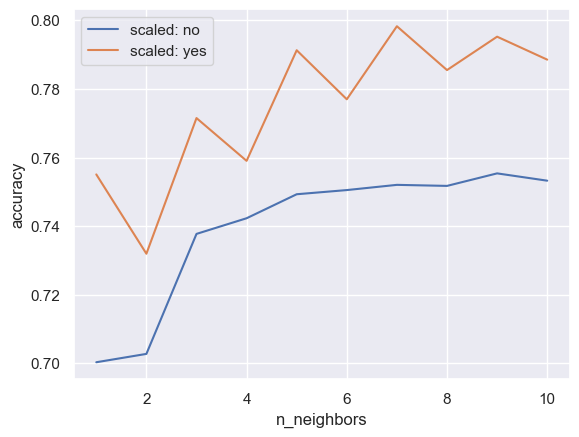

In [3]:
## Tune über n_neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

params = range(1, 11)
scores = []  ## scores ohne Standardisieren
scores_sc = []  ## scores mit Standardisieren

for param in params:
    model.set_params(n_neighbors=param)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)

    model.fit(X_train_scaled, y_train)
    score_sc = model.score(X_test_scaled, y_test)
    scores_sc.append(score_sc)

    print(param, score, score_sc)  ## zum Vergolgen der Fortschritte

fig = sns.lineplot(x=params, y=scores, label='scaled: no')
fig = sns.lineplot(x=params, y=scores_sc, label='scaled: yes')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy");

1 0.7614846364466078 0.7992090051718893
2 0.7520535442652875 0.7982963188317614
3 0.7523577730453301 0.7940371159111652


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

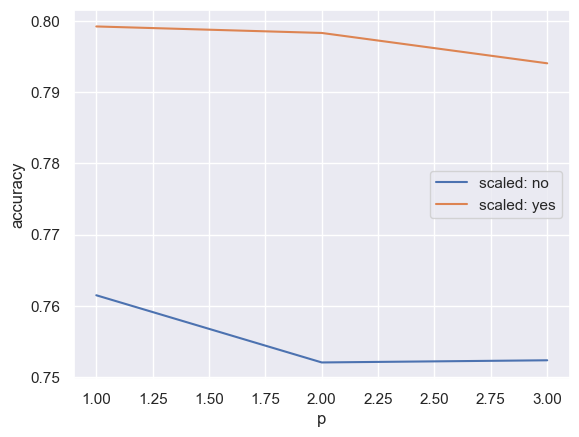

In [4]:
## Tune über p
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

params = range(1, 4) ## dasselbe wie [1, 2, 3]
scores = []  ## scores ohne Standardisieren
scores_sc = []  ## scores mit Standardisieren

for param in params:
    model.set_params(n_neighbors=7, p=param)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)

    model.fit(X_train_scaled, y_train)
    score_sc = model.score(X_test_scaled, y_test)
    scores_sc.append(score_sc)

    print(param, score, score_sc)  ## zum Verfolgen der Fortschritte

fig = sns.lineplot(x=params, y=scores, label='scaled: no')
fig = sns.lineplot(x=params, y=scores_sc, label='scaled: yes')

plt.xlabel("p")
plt.ylabel("accuracy");

**Fazit**:
* standardisieren bringt bei diesem Learner tatsächlich eine markante Verbesserung der Performance
* p=1 ist leicht besser als p=2
* ab p = 3 nimmt der Zeitbedarf markant zu